In [127]:
import sys  
!{sys.executable} -m pip install --user missingno

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import math

In [128]:
train_data = pd.read_csv('Case1/case1Data.txt', sep=", ", header=0,index_col=None)
mod_train_data = train_data
mod_train_data.head()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_91,x_92,x_93,x_94,x_95,C_1,C_2,C_3,C_4,C_5
0,-69.393097,10.055585,0.289036,-46.748373,9.289237,9.729013,17.036793,-12.430320,11.015882,2.256337,...,9.799563,15.842689,-9.527268,8.680547,6.870564,NaN,I,NaN,H,K
1,-45.143269,5.661929,-8.172350,-51.445846,2.869381,5.857869,16.976673,-14.625289,1.945814,-7.452895,...,-2.533666,12.984296,-9.138499,1.790938,-0.278660,K,I,I,I,K
2,-117.340541,1.420570,-7.479476,-51.696962,-1.654729,4.731166,9.848327,-15.459621,3.922184,-1.210801,...,3.461843,15.294486,-13.668956,5.448614,1.847178,G,H,I,J,K
3,-176.817697,7.716013,-7.750335,-49.142539,1.118904,5.283744,16.822317,-12.166760,1.292544,-2.182322,...,4.470430,17.564489,-13.049522,3.505629,2.672849,I,I,J,G,J
4,-22.875939,5.195233,-8.252987,-52.143856,2.112213,2.034861,12.717198,-22.389714,1.438919,-7.308590,...,-1.374044,11.119488,-9.881581,2.819918,-0.221832,I,H,K,J,K


In [129]:
mod_train_data = train_data.replace(' NaN',np.nan)

In [130]:
math.isnan(mod_train_data.iloc[0][98])

True

In [131]:
mod_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 101 entries, y to C_5
dtypes: float64(96), object(5)
memory usage: 79.0+ KB


<AxesSubplot:>

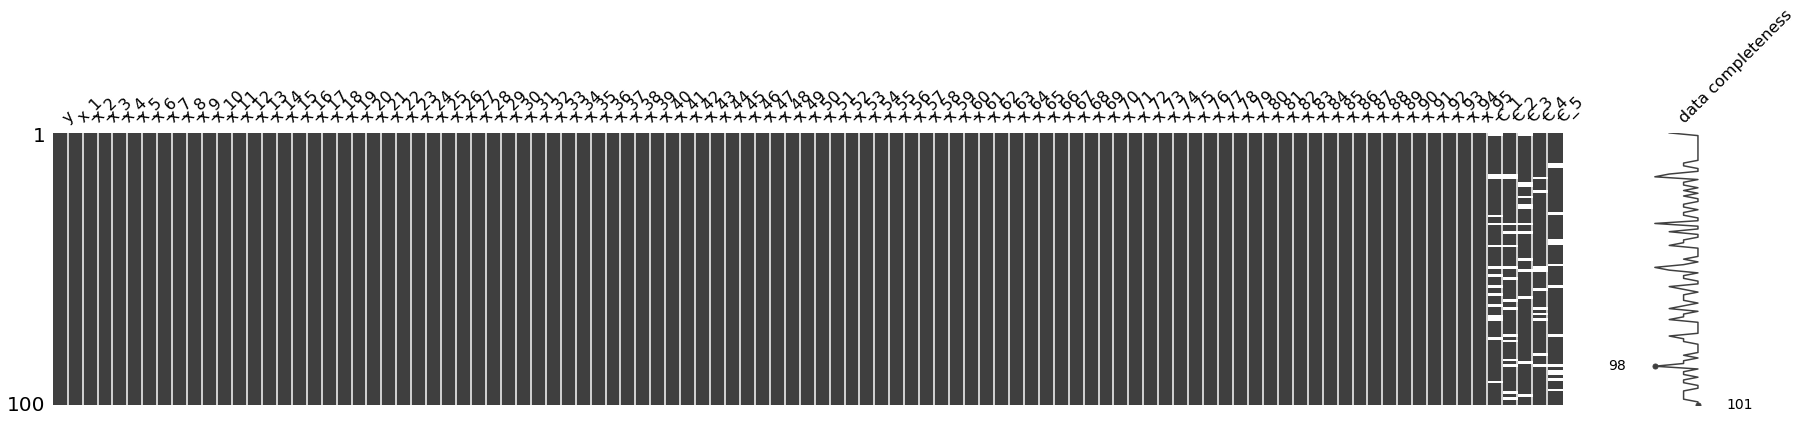

In [132]:
missingno.matrix(mod_train_data, figsize = (30,5), labels=True)

In [133]:
#mod_train_data.info(verbose=True)


In [134]:
#import matplotlib.pyplot as plt
#mod_train_data.drop(mod_train_data.columns[[-1, -2, -3, -4, -5]], axis=1, inplace=True)
#mod_train_data.hist(bins=50, figsize=(20,15))
#plt.show()

In [135]:
#print(mod_train_data_cat.iloc[:,0])
attributes = ["C_1", "C_2","C_3","C_4","C_5"]
mod_train_data_cat = mod_train_data[attributes]
for i in range(5):
    col = mod_train_data_cat.iloc[:,i]
    print(col.value_counts(dropna=False))


I      19
K      19
G      17
J      16
NaN    15
H      14
Name: C_1, dtype: int64
I      44
H      41
NaN    15
Name: C_2, dtype: int64
H      23
J      21
I      16
G      14
NaN    13
K      13
Name: C_3, dtype: int64
H      19
J      19
I      18
G      18
K      16
NaN    10
Name: C_4, dtype: int64
H      22
K      20
J      17
I      14
G      14
NaN    13
Name: C_5, dtype: int64


In [136]:
attributes = ["C_1", "C_2","C_3","C_4","C_5"]
mod_train_data_cat = mod_train_data[attributes]
print(mod_train_data_cat)
for i in range(5):
    col = mod_train_data_cat.iloc[:,i]
    colcount = col.value_counts()
    dist = stats.rv_discrete(values=((np.arange(colcount.shape[0]), colcount/colcount.sum())),seed=42)
    fill_idxs = dist.rvs(size=mod_train_data_cat.shape[0] - col.count())
    col.loc[col.isnull()] = colcount.iloc[fill_idxs].index.values
print(mod_train_data_cat)
mod_train_data[attributes] = mod_train_data_cat
"""
https://stackoverflow.com/questions/27474439/fill-multiple-nulls-for-categorical-data
"""

    C_1  C_2  C_3 C_4 C_5
0   NaN    I  NaN   H   K
1     K    I    I   I   K
2     G    H    I   J   K
3     I    I    J   G   J
4     I    H    K   J   K
..  ...  ...  ...  ..  ..
95    G  NaN    J   G   I
96    G    H  NaN   K   I
97    I  NaN    K   I   K
98    K    I    I   K   H
99    K    I    G   I   I

[100 rows x 5 columns]
   C_1 C_2 C_3 C_4 C_5
0    K   I   J   H   K
1    K   I   I   I   K
2    G   H   I   J   K
3    I   I   J   G   J
4    I   H   K   J   K
..  ..  ..  ..  ..  ..
95   G   I   J   G   I
96   G   H   G   K   I
97   I   I   K   I   K
98   K   I   I   K   H
99   K   I   G   I   I

[100 rows x 5 columns]


'\nhttps://stackoverflow.com/questions/27474439/fill-multiple-nulls-for-categorical-data\n'

In [137]:
x_train, x_test, y_train, y_test = train_test_split(mod_train_data.drop(columns='y'),mod_train_data.iloc[:,0],test_size=0.2, random_state=42)

<AxesSubplot:>

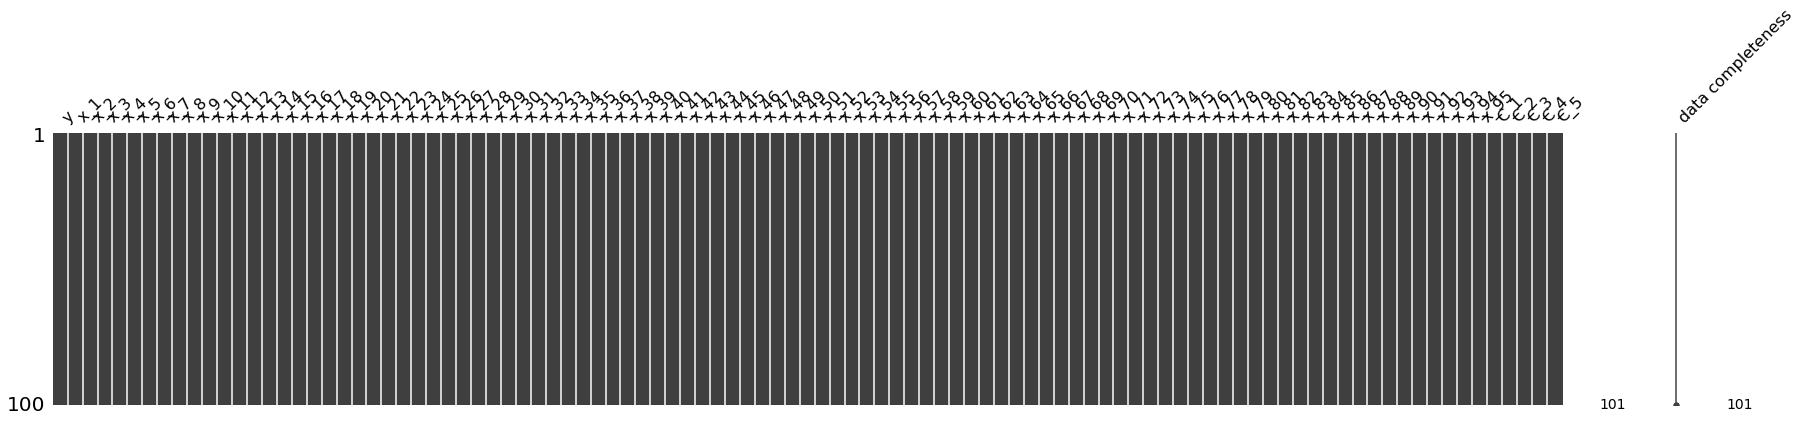

In [138]:
missingno.matrix(mod_train_data, figsize = (30,5), labels=True)

In [139]:
ordinal_encoder = OrdinalEncoder()
attributes = ["C_1", "C_2","C_3","C_4","C_5"]
mod_train_data_encoded = ordinal_encoder.fit_transform(mod_train_data[attributes])
print(mod_train_data_encoded)
ordinal_encoder.categories_

[[4. 1. 3. 1. 4.]
 [4. 1. 2. 2. 4.]
 [0. 0. 2. 3. 4.]
 [2. 1. 3. 0. 3.]
 [2. 0. 4. 3. 4.]
 [0. 0. 3. 2. 1.]
 [1. 1. 1. 4. 4.]
 [4. 1. 0. 0. 0.]
 [4. 1. 2. 0. 3.]
 [4. 0. 2. 4. 3.]
 [0. 1. 2. 1. 1.]
 [4. 0. 1. 1. 4.]
 [4. 1. 1. 4. 0.]
 [4. 0. 1. 1. 1.]
 [4. 0. 0. 2. 0.]
 [1. 1. 4. 0. 4.]
 [3. 0. 3. 3. 1.]
 [1. 0. 1. 2. 1.]
 [4. 0. 4. 0. 3.]
 [4. 1. 0. 4. 0.]
 [0. 0. 1. 0. 4.]
 [4. 1. 0. 4. 0.]
 [2. 0. 1. 2. 0.]
 [3. 1. 2. 1. 4.]
 [0. 1. 1. 3. 2.]
 [2. 0. 3. 2. 3.]
 [4. 1. 1. 4. 1.]
 [3. 0. 1. 3. 0.]
 [0. 1. 3. 1. 0.]
 [0. 1. 0. 3. 2.]
 [0. 0. 1. 0. 3.]
 [2. 1. 2. 1. 2.]
 [3. 0. 2. 1. 1.]
 [2. 0. 1. 3. 1.]
 [3. 0. 1. 4. 3.]
 [0. 0. 3. 3. 1.]
 [2. 0. 4. 3. 0.]
 [2. 1. 3. 0. 4.]
 [3. 0. 3. 3. 3.]
 [1. 1. 1. 2. 3.]
 [3. 0. 3. 0. 1.]
 [2. 1. 0. 3. 2.]
 [1. 0. 2. 3. 3.]
 [2. 0. 0. 4. 1.]
 [4. 1. 4. 1. 2.]
 [1. 1. 2. 2. 2.]
 [1. 0. 2. 1. 1.]
 [4. 0. 2. 0. 4.]
 [2. 1. 2. 4. 1.]
 [2. 1. 1. 0. 1.]
 [0. 1. 0. 2. 4.]
 [4. 1. 4. 4. 4.]
 [1. 1. 1. 1. 1.]
 [1. 1. 3. 0. 4.]
 [1. 0. 1. 0. 3.]
 [1. 0. 3.

[array(['G', 'H', 'I', 'J', 'K'], dtype=object),
 array(['H', 'I'], dtype=object),
 array(['G', 'H', 'I', 'J', 'K'], dtype=object),
 array(['G', 'H', 'I', 'J', 'K'], dtype=object),
 array(['G', 'H', 'I', 'J', 'K'], dtype=object)]

In [140]:
num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
 #'pca', PCA(n_components=0.95),
])

In [141]:
num_attribs = list(mod_train_data[mod_train_data.columns[1:-5]])
cat_attribs = ["C_1", "C_2","C_3","C_4","C_5"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat",  OneHotEncoder(), cat_attribs), #or OrdinalEncoder()
])

In [142]:
x_train_prepared = full_pipeline.fit_transform(x_train)
x_test_prepared = full_pipeline.transform(x_test)

%store x_train_prepared
%store x_test_prepared
%store y_train
%store y_test


Stored 'x_train_prepared' (ndarray)
Stored 'x_test_prepared' (ndarray)
Stored 'y_train' (Series)
Stored 'y_test' (Series)


In [143]:
corr_matrix = mod_train_data.corr()
corr_matrix["y"].sort_values(ascending=False)

y       1.000000
x_36   -0.019840
x_53   -0.023941
x_74   -0.034904
x_22   -0.036685
          ...   
x_50   -0.476229
x_95   -0.530692
x_52   -0.622368
x_42   -0.714899
x_73   -0.734053
Name: y, Length: 96, dtype: float64

array([[<AxesSubplot:xlabel='y', ylabel='y'>,
        <AxesSubplot:xlabel='x_73', ylabel='y'>,
        <AxesSubplot:xlabel='x_42', ylabel='y'>,
        <AxesSubplot:xlabel='x_52', ylabel='y'>],
       [<AxesSubplot:xlabel='y', ylabel='x_73'>,
        <AxesSubplot:xlabel='x_73', ylabel='x_73'>,
        <AxesSubplot:xlabel='x_42', ylabel='x_73'>,
        <AxesSubplot:xlabel='x_52', ylabel='x_73'>],
       [<AxesSubplot:xlabel='y', ylabel='x_42'>,
        <AxesSubplot:xlabel='x_73', ylabel='x_42'>,
        <AxesSubplot:xlabel='x_42', ylabel='x_42'>,
        <AxesSubplot:xlabel='x_52', ylabel='x_42'>],
       [<AxesSubplot:xlabel='y', ylabel='x_52'>,
        <AxesSubplot:xlabel='x_73', ylabel='x_52'>,
        <AxesSubplot:xlabel='x_42', ylabel='x_52'>,
        <AxesSubplot:xlabel='x_52', ylabel='x_52'>]], dtype=object)

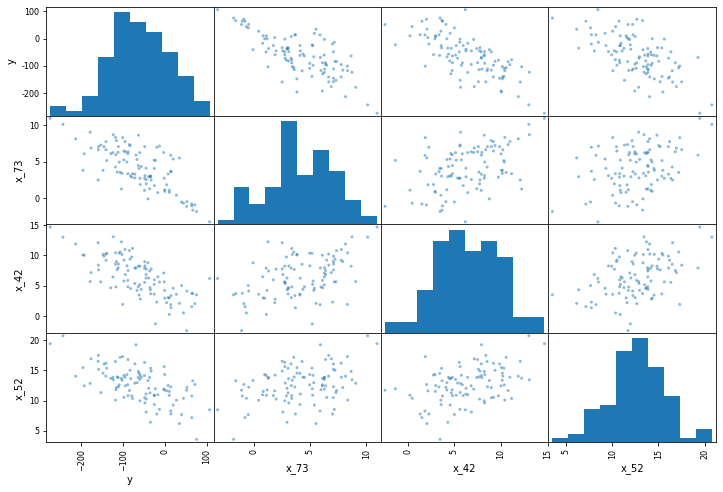

In [144]:
attributes = ["y", "x_73", "x_42","x_52"]
scatter_matrix(mod_train_data[attributes], figsize=(12, 8))